In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Этот датасет содержит информацию о возможных факторах, влияющих на риск инсульта, и был ли приступ уже. На его основе мы планируем обучить модель, которая, анализируя данные о человеке, сможет прогнозировать, случится ли у него инсульт.

Описние данных:

id - уникальный идентификатор

gender - "Мужской", "Женский" или "Другой"

age - возраст пациента

hypertension - 0, если у пациента нет гипертонии, 1, если у пациента гипертония

heart_disease - 0, если у пациента нет заболеваний сердца, 1, если у пациента есть заболевание сердца

ever_married - был ли брак, "Нет" или "Да"

work_type - вид занятости(карьера), "детский", "государственный", "никогда не работавший", "частный" или "самозанятый"

Residence_type - местность проживания, "Сельская" или "Городская"

avg_glucose_level - средний уровень глюкозы в крови 

bmi - индекс массы тела

smoking_status - курение : "ранее курил", "никогда не курил", "курит" или "неизвестно"*

stroke -  был ли инсульт: 1, если у пациента был инсульт или 0, если нет


*Примечание: «Неизвестно» в smoking_status означает, что информация для этого пациента недоступна.

In [2]:
df = pd.read_csv('health.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Мы видим, что есть много пропусков в столбце bmi.

Этот столбец обозначает индекс массы тела пациентов.

Пропусков всего 201 строка при том, что всего у нас более 5000 стр. Значит, мы можем подумать, как заполнить пропуски.

Имт- численный признак, который не может быть нулем, значит стоит заполнить его средним значением по столбцу, так как это не повлияет на метрики качества модели машинного обучения.

In [8]:
df['bmi'].fillna(np.mean(df['bmi']), inplace=True)

In [9]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Таким образом, проблема с пропусками значений исправлена. Следовательно, данные теперь можно визуализировать.

Визуализация данных:

<Axes: xlabel='smoking_status', ylabel='count'>

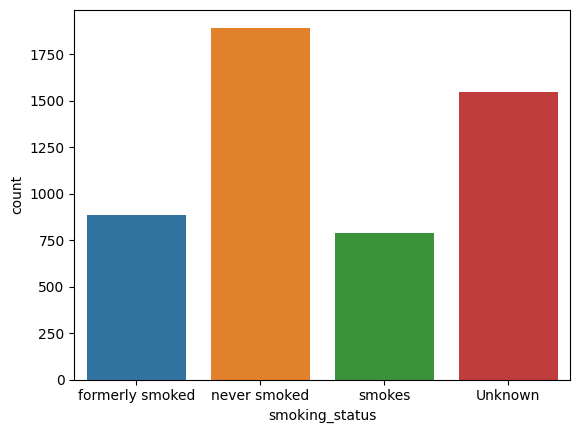

In [29]:
sns.countplot(x=df['smoking_status'])

(-1.1797758569063581,
 1.1934328985429894,
 -1.152410647365674,
 1.1024948518981093)

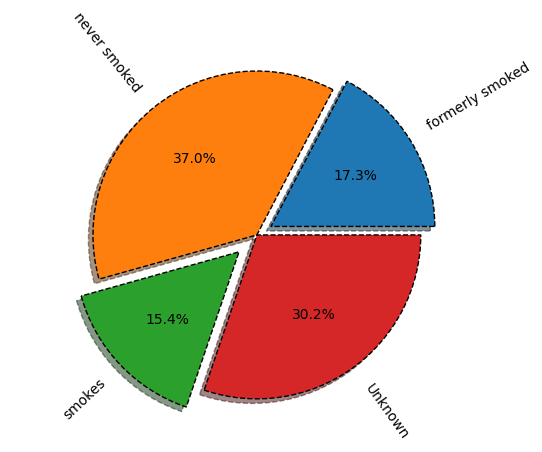

In [23]:
vals = []
labels = df['smoking_status'].unique() 

for lbl in labels:
    vals.append(df[df['smoking_status'] == lbl].shape[0])

explode = (0.1, 0, 0.15, 0)

fig, ax = plt.subplots()
ax.pie(vals, labels=labels, autopct='%1.1f%%', shadow=True, explode=explode, wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, rotatelabels=True)
ax.axis("equal")

(-1.1020039275695819,
 1.142087440747661,
 -1.107225722986476,
 1.2517634689794432)

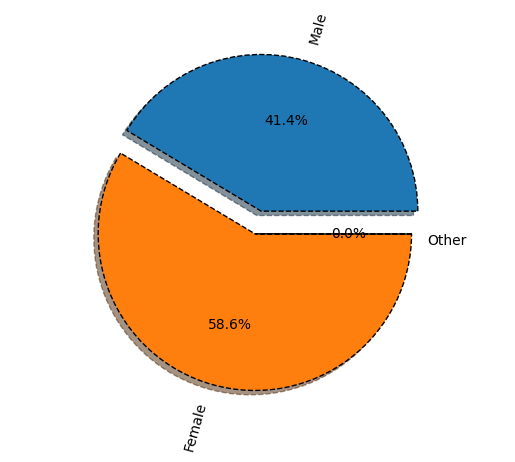

In [47]:
vals = []
labels = df['gender'].unique() 

for lbl in labels:
    vals.append(df[df['gender'] == lbl].shape[0])

explode = (0.15, 0, 0)

fig, ax = plt.subplots()
ax.pie(vals, labels=labels, autopct='%1.1f%%', shadow=True, explode=explode, wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, rotatelabels=True)
ax.axis("equal")

(-1.1026463651006564,
 1.1001260173857454,
 -1.104998357202118,
 1.2049666353586053)

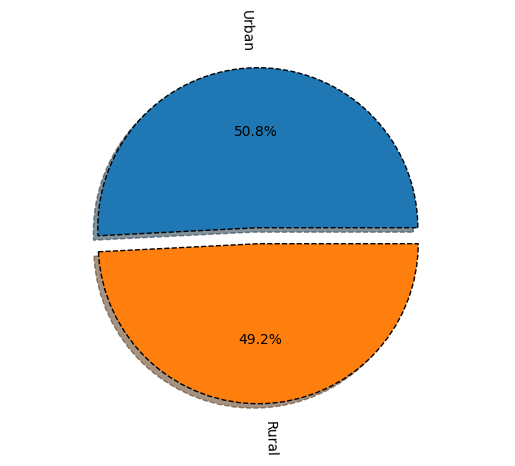

In [49]:
vals = []
labels = df['Residence_type'].unique() 

for lbl in labels:
    vals.append(df[df['Residence_type'] == lbl].shape[0])

explode = (0.1, 0)

fig, ax = plt.subplots()
ax.pie(vals, labels=labels, autopct='%1.1f%%', shadow=True, explode=explode, wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, rotatelabels=True)
ax.axis("equal")

(-1.200117039398052, 1.1047674780665728, -1.0698592315800328, 1.13014036150418)

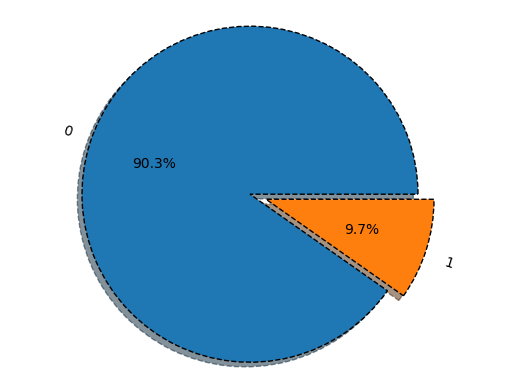

In [51]:
vals = []
labels = df['hypertension'].unique() 

for lbl in labels:
    vals.append(df[df['hypertension'] == lbl].shape[0])

explode = (0.1, 0)

fig, ax = plt.subplots()
ax.pie(vals, labels=labels, autopct='%1.1f%%', shadow=True, explode=explode, wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, rotatelabels=True)
ax.axis("equal")

(-1.138677896040699,
 1.416098772612873,
 -1.2555625932782941,
 1.2094698421793773)

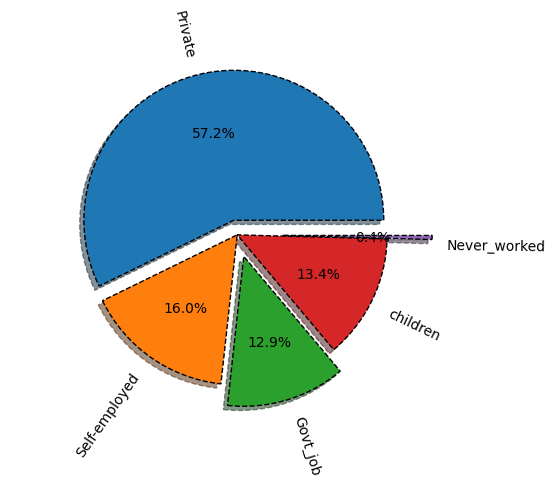

In [53]:
vals = []
labels = df['work_type'].unique()

for lbl in labels:
    vals.append(df[df['work_type'] == lbl].shape[0])

explode = (0.1, 0, 0.15, 0, 0.3)

fig, ax = plt.subplots()
ax.pie(vals, labels=labels, autopct='%1.1f%%', shadow=True, explode=explode, wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, rotatelabels=True)
ax.axis("equal")

описание круговых диаграмм:

на первой диаграмме мы видим, что большинство опрошенных никогда не курили

по второй диаграмме видно, что большинство опрошенных - женщины

по данным третьей диаграмме можно сделать вывод, что процент проживающих в городе выше, чем в сельской местности

на третьей диаграмме видно, что подавляющее большинство людей из выбранной базы данных не имеют гипертонии

по данным четвертой диаграммы самый высокий процент пациентов работает в частных компаниях

Text(0.5, 1.0, 'Начальная корреляция')

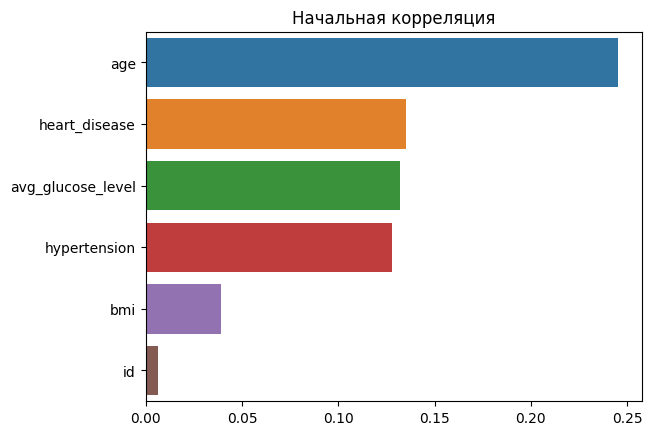

In [27]:
numeric_data = df.drop(columns=['stroke']).select_dtypes([np.number])
numeric_features = numeric_data.columns

correlations = df.drop(columns=['stroke'])[numeric_features].corrwith(df['stroke']).sort_values(ascending=False)

plot = sns.barplot(y=correlations.index, x=correlations)
plot.set_title('Начальная корреляция')

На данном графике видна корреляция между различными признаками и фактом наличия инсульта у пациентов. Так, относительно высокое значение корреляции прослеживается между возрастом человека и фактом инсульта. Также, исходя из графика, можно сделать вывод, что на инсульт незначительно заболевания сердца, уровень глюкозы в крови и гипертония. При этом, что интересно, индекс массы тела имеет очень слабую корреляцию с инсультом.

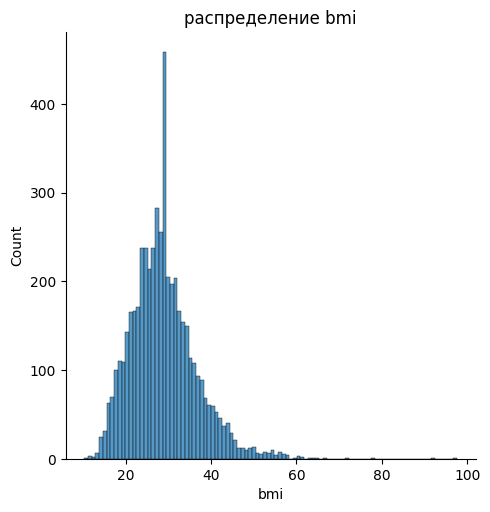

In [56]:
sns.displot(df['bmi'], bins=100)

plt.title('распределение bmi')
plt.show()

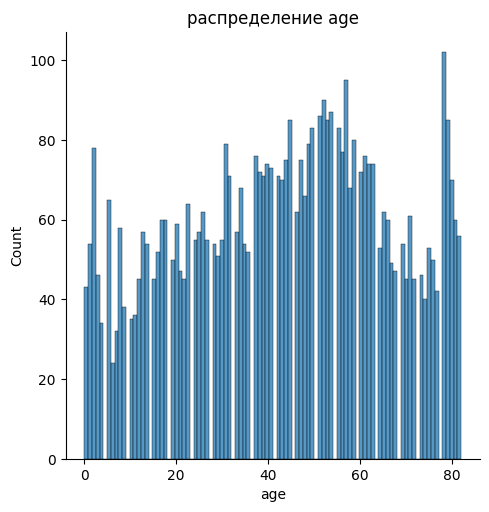

In [54]:
sns.displot(df['age'], bins=100)

plt.title('распределение age')
plt.show()

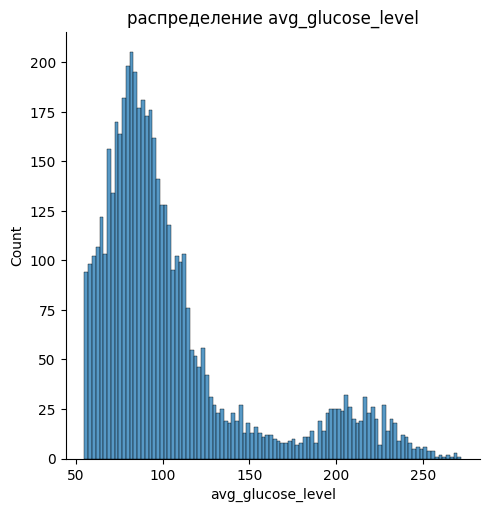

In [55]:
sns.displot(df['avg_glucose_level'], bins=100) 

plt.title('распределение avg_glucose_level')
plt.show()

На графиках выше можно увидеть распределение показателей

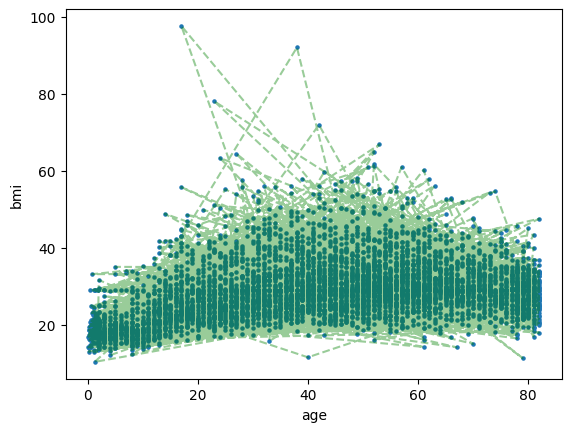

In [41]:
df.plot(x="age", y="bmi", kind="scatter", s=5)
plt.plot(df["age"], df["bmi"], "g--", alpha=0.4)

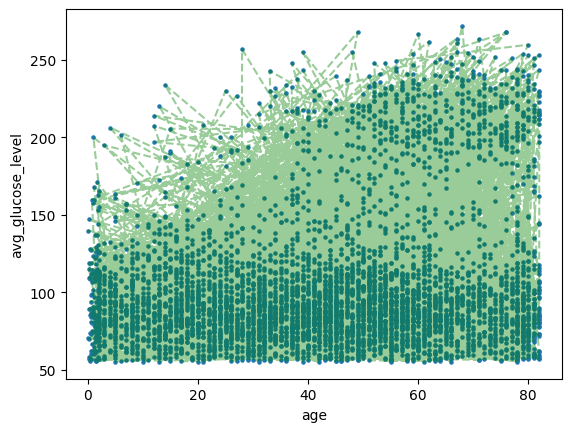

In [42]:
df.plot(x="age", y="avg_glucose_level", kind="scatter", s=5)
plt.plot(df["age"], df["avg_glucose_level"], "g--", alpha=0.4)

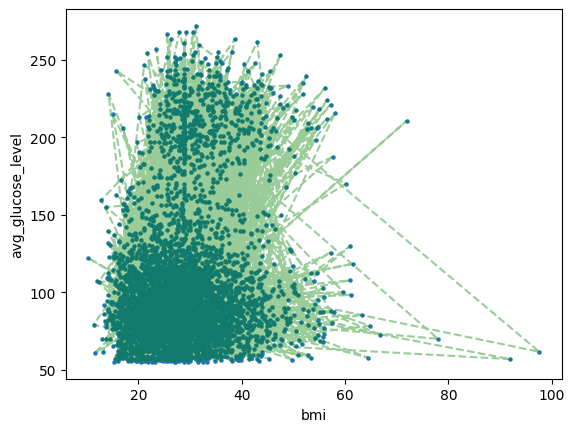

In [43]:
df.plot(x="bmi", y="avg_glucose_level", kind="scatter", s=5)
plt.plot(df["bmi"], df["avg_glucose_level"], "g--", alpha=0.4)

На последних трех графиках линейная заисимость между выбранными признаками не наблюдается

### Гипотеза: Существует связь между возрастом (Age) и риском развития инсульта.

Для проверки этой гипотезы можно использовать статистические методы, такие как t-тест или анализ дисперсии (ANOVA).

Примерный план действий:

Разделите данные на две группы: пациенты с инсультом и пациенты без инсульта.
Сравните средний возраст между этими двумя группами.
Примените статистический тест, такой как t-тест или ANOVA, чтобы определить, есть ли статистически значимая разница между группами.
Проанализируйте результаты теста и сделайте выводы о наличии или отсутствии связи между возрастом и риском развития инсульта.

In [3]:
import pandas as pd
import scipy.stats as stats

data = pd.read_csv('/Users/sardobekismailov/Desktop/health.csv')

stroke_patients = data[data['stroke'] == 1]['age']
non_stroke_patients = data[data['stroke'] == 0]['age']

t_statistic, p_value = stats.ttest_ind(stroke_patients, non_stroke_patients)

print('T-статистика:', t_statistic)
print('p-значение:', p_value)


T-статистика: 18.08083426887953
p-значение: 7.0307775129939774e-71


Результаты анализа данных показывают, что значение t-статистики равно 18.08, а p-значение составляет 7.03 * 10^-71.

На основе этих результатов можно сделать вывод, что существует статистически значимая разница в среднем возрасте между пациентами с инсультом и пациентами без инсульта. P-значение, которое близко к нулю, указывает на то, что разница в возрасте между этими двумя группами является значимой.

Таким образом, на основе данного анализа можно подтвердить гипотезу о связи между возрастом и риском развития инсульта в исследуемой выборке данных.